# Brief Summary of Fourier Methods for Image Processing

Yada yada yada Ryan for the love of god just copy your notes into here


## Now we move on to the actual tutorial

To anyone reading this section, this tutorial works. Just doesn't have a lot of polish on it yet lol.

1) ~~Imports and backend configuration~~

2) Numpy example (easy on the cpu stuff) --> have this written on laptop or in imagepypelines image plugin

3) PyTorch example (~~with GPU~~ and without GPU using context environment, stacks of images too!!!)

4) CuPy example? Not super necessary, but it'd be nice to show people lower level options

5) Numba+CUDA example? Again, not super necessary, but ^^^

6) Real-world examples (maybe intro into physical optics or feature analysis? could be fun little addition)

7) Benchmarking --> super low hanging fruit, just need to do it!!!

8) ~~Get running on Colab~~

9) Clean up kernel and normalize everything so it just looks nicer. Maybe do a plot of source, filter, and output in space and in frequency for illustrative purposes

10) Port helper functions to regular ol' python library


## Try this notebook using Google Colab! 

This can be useful if you'd like to avoid setting up the dependencies mentioned in the README on your own machine, and is a free service. Be sure to select a runtime with GPU acceleration!

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/RyanHartzell/cudnn-image-filtering/blob/master/notebooks/CuDNN%20Image%20Filtering%20Tutorial%20Using%20PyTorch.ipynb)

## Let's start with some imports

In [15]:
# Import necessary libraries and setup default configurations
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt

import imageio

import torch
import torch.nn.functional as F

# Make sure backend behaves deterministically for reproducability
torch.backends.cudnn.deterministic = True

## Next, we'll read in some image data

We'll be using lenna.tif if you have relative access to the 'images' directory of this project, and using an imageio-native test image if running on either your own machine or on Google Colab.

In [7]:
# Set up Lena.tif input - DO NOT RUN THIS CELL IF USING GOOGLE COLAB!!!
src = imageio.imread("../images/inputs/lenna-256x256.tif").astype(np.float32)

In [30]:
# Set up camera.png input - SAFE FOR GOOGLE COLAB
src = imageio.imread("imageio:camera.png").astype(np.float32)

<IPython.core.display.Javascript object>


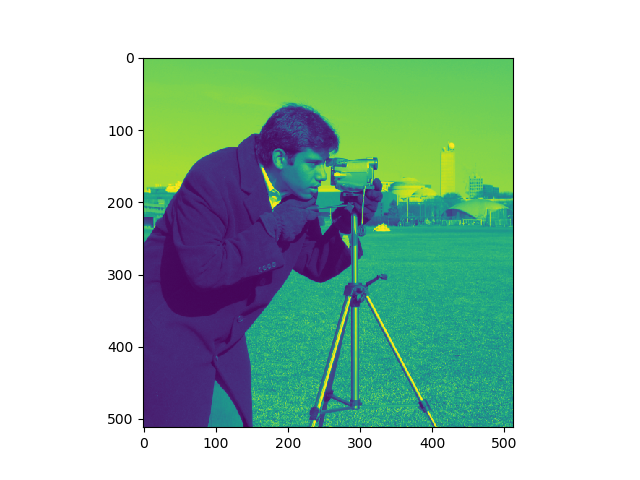

In [31]:
# Show the source image
fig = plt.figure()
plt.imshow(src)
plt.show()

## Here we set up our filter, known as a "kernel"

In [46]:
# Set up filter kernel of shape 5x5 (And yes, this is in fact an incredibly wonky kernel just for fun lol)
kernel = np.asarray([[  1,    1,   25,    1,    1],
                     [  1,   50,   10,   50,    1],
                     [ 25,   10,    1,   10,   25],
                     [  1,   50,   10,   50,    1],
                     [  1,    1,   25,    1,    1]], dtype=np.float32)

## Next we've got a basic filtering example set up using Numpy

In [33]:
# Coming soon to a jupyter notebook near you...

## And now we've got a GPU accelerated example using PyTorch

The following cells will show how to use PyTorch along with CUDA and CuDNN (a CUDA library for optimizing deep neural network performance in both training and inference, since it's all just filtering) for image filtering tasks.

Shape of Source tensor is:   torch.Size([1, 1, 512, 512])
Shape of Filter tensor is:   torch.Size([1, 1, 5, 5])
Shape of Output tensor is:   torch.Size([1, 1, 508, 508])    Notice we lost 2 pixels on either side since we didn't pad!


<IPython.core.display.Javascript object>


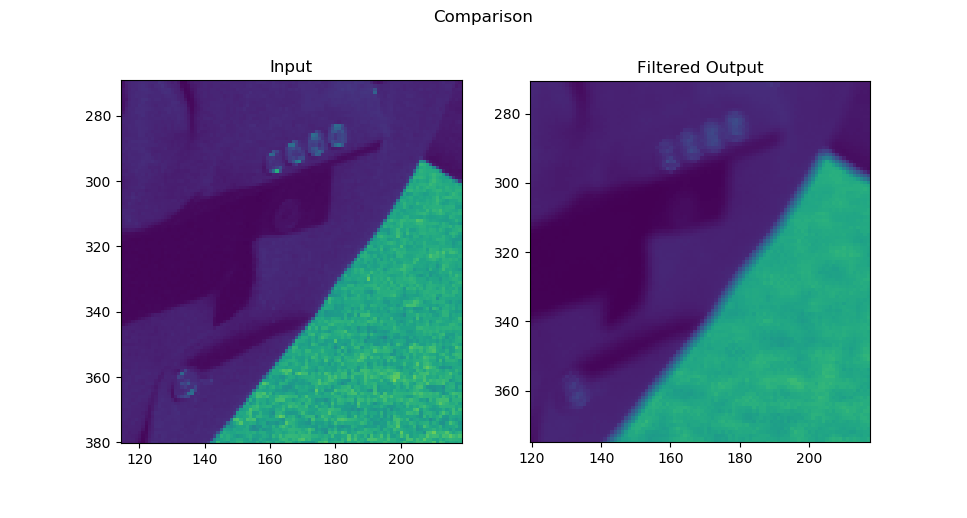

In [44]:
# convert to tensor of shape: [sample_size, channels, height, width]
source_tensor = torch.from_numpy(src)
source_tensor.unsqueeze_(0).unsqueeze_(0)   # adds dimensions of samplesize and channels or depth (for single image case)
print("Shape of Source tensor is:  ", source_tensor.size())

filter_tensor = torch.from_numpy(kernel)
filter_tensor.unsqueeze_(0).unsqueeze_(0)   # adds dimensions of samplesize and channels or depth (for single image case)
print("Shape of Filter tensor is:  ", filter_tensor.size())

# perform filtering
output_tensor = F.conv2d(source_tensor.cuda(), filter_tensor.cuda()).to("cpu")   # without the '.to("cpu")' results would be on gpu
print("Shape of Output tensor is:  ", output_tensor.size(), "   Notice we lost 2 pixels on either side since we didn't pad!")

# print(src_tensor.device)
# print(filter_tensor.device)
# print(output_tensor.device)

output = np.asarray(output_tensor)[0,0,:,:]   # For now we just want the [H,W] image representation
# print(output)

# plot result
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Comparison')
ax1.set_title("Input")
ax1.imshow(src)
ax2.set_title("Filtered Output")
ax2.imshow(output)
plt.show()

## With the basics done, let's collect some timing benchmarks

In [45]:
%%timeit -n 1000

# Repeat operation for timing analysis
output_tensor = F.conv2d(source_tensor.cuda(), filter_tensor.cuda()).to("cpu")
output = np.asarray(output_tensor)[0,0,:,:]   # For now we just want the [H,W] image representation

909 µs ± 61.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
